# First try with usual ML models

## Basic preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, ElasticNet, ridge_regression, LinearRegression, Ridge
from sklearn.ensemble import AdaBoostRegressor #GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, 
from sklearn.svm import SVR

In [4]:
input_dir = os.path.join('..', 'input')
output_dir = os.path.join('..', 'output')

In [5]:
# each id is unique so we can use this column as index
X_train_1 = pd.read_csv(os.path.join(output_dir, "X_train_1.csv"))
X_train_2 = pd.read_csv(os.path.join(output_dir, "X_train_2.csv"))
X_test_1 = pd.read_csv(os.path.join(output_dir, "X_test_1.csv"))
X_test_2 = pd.read_csv(os.path.join(output_dir, "X_test_2.csv"))
X_train_1.head()

,temp_1,mean_national_temp,humidity_1,consumption_secondary_1,consumption_secondary_2,consumption_secondary_3,day of year,vacances_zone_a,vacances_zone_b,vacances_zone_c,est_jour_ferie,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,week of year_2,week of year_3,week of year_4,week of year_5,week of year_6,week of year_7,week of year_8,week of year_9,week of year_10,week of year_11,week of year_12,week of year_13,week of year_14,week of year_15,week of year_16,week of year_17,week of year_18,week of year_19,week of year_20,week of year_21,week of year_22,week of year_23,...,week of year_26,week of year_27,week of year_28,week of year_29,week of year_30,week of year_31,week of year_32,week of year_33,week of year_34,week of year_35,week of year_36,week of year_37,week of year_38,week of year_39,week of year_40,week of year_41,week of year_42,week of year_43,week of year_44,week of year_45,week of year_46,week of year_47,week of year_48,week of year_49,week of year_50,week of year_51,week of year_52,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.356234,0.428571,0.936709,0.155263,0.208451,0.155462,306,1,1,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.348601,0.428571,0.974684,0.150000,0.169014,0.142857,306,1,1,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.318066,0.425249,0.962025,0.152632,0.169014,0.147059,306,1,1,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.335878,0.421927,0.987342,0.144737,0.169014,0.142857,306,1,1,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.300254,0.418605,0.974684,0.184211,0.169014,0.147059,306,1,1,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
X_test_1.head()

,temp_1,mean_national_temp,humidity_1,consumption_secondary_1,consumption_secondary_2,consumption_secondary_3,day of year,vacances_zone_a,vacances_zone_b,vacances_zone_c,est_jour_ferie,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,week of year_2,week of year_3,week of year_4,week of year_5,week of year_6,week of year_7,week of year_8,week of year_9,week of year_10,week of year_11,week of year_12,week of year_13,week of year_14,week of year_15,week of year_16,week of year_17,week of year_18,week of year_19,week of year_20,week of year_21,week of year_22,week of year_23,...,week of year_26,week of year_27,week of year_28,week of year_29,week of year_30,week of year_31,week of year_32,week of year_33,week of year_34,week of year_35,week of year_36,week of year_37,week of year_38,week of year_39,week of year_40,week of year_41,week of year_42,week of year_43,week of year_44,week of year_45,week of year_46,week of year_47,week of year_48,week of year_49,week of year_50,week of year_51,week of year_52,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.315315,0.368750,0.884615,0.202381,0.380665,0.189583,305,1,1,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.322072,0.365625,0.858974,0.200000,0.350453,0.179167,305,1,1,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.322072,0.365625,0.846154,0.214286,0.353474,0.185417,305,1,1,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.299550,0.362500,0.871795,0.219048,0.347432,0.177083,305,1,1,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.281532,0.359375,0.871795,0.221429,0.347432,0.183333,305,1,1,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train_1.shape, X_train_2.shape, X_test_1.shape, X_test_2.shape

((8760, 102), (8760, 102), (8736, 102), (8736, 102))

In [8]:
y_train_1 = pd.read_csv("../output/y_train_1.csv", header=None)
y_train_2 = pd.read_csv("../output/y_train_2.csv", header=None)
y_train_1.head()

,0
0,100
1,101
2,100
3,101
4,100


In [9]:
y_train_1.shape, y_train_2.shape

((8760, 1), (8760, 1))

## Metric / Benchmark

For this challenge we used the mean absolute error.

Even though the RMSE is generally the preferred performance measure for regression tasks, in some contexts you may prefer to use another function. For example, suppose that there are many outlier dstricts. In that case, you may consider using the Mean Absolute Error.

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values. Various distance measures, or norms, are possible:

* Computing the root of a sum of squares (RMSE) corresponds to the Euclidian norm: it is the notion of distance you are familiar with. It is also called the l 2 norm, noted ∥ · ∥ 2 (or just ∥ · ∥).

* Computing the sum of absolutes (MAE) corresponds to the l 1 norm, noted ∥ · ∥ 1 . It is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.

The RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.


In [10]:
def weighted_mean_absolute_error(y_true, y_pred):
    """ Simplified version without loading csv for testing purposes on train sets"""
    c12 = np.array([1136987, 1364719])
    return 2 * mean_absolute_error(y_true*c12[0], y_pred*c12[1]) / np.sum(c12)

On the assumption that a safety reserve of 20% is needed to covert the supply

## Functions to print/show predictions and make submissions

In [11]:
def print_metric_on_train(fitted_model_1, fitted_model_2):
    """ prints and returns the metric on the train datasets"""
    
    y_train_pred_1, y_train_pred_2 = fitted_model_1.predict(X_train_1), fitted_model_2.predict(X_train_2)
    # arg = dataframe_1_y_true, dataframe_2_y_pred
    
    wmae_1 = weighted_mean_absolute_error(y_train_1, y_train_pred_1)
    wmae_2 = weighted_mean_absolute_error(y_train_2, y_train_pred_2)
    
    print(f'weighted_mean_absolute_error on X_train_1 : {wmae_1}')
    print(f'weighted_mean_absolute_error on X_train_2 : {wmae_2}')
    
    return wmae_1, wmae_2, y_train_pred_1, y_train_pred_2

In [55]:
def display_pred_on_train(y_train, y_train_pred):
    """ plots the prediction and the target of the ONE train data sets in order to see how the model has learnt"""
      
    plt.figure(figsize=(16, 8))
    plt.title("Real & Predicted Consumption Evolution for ONE site over a year")
    sns.lineplot(x=y_train.index, y=y_train[0], label='truth')
    sns.lineplot(x=y_train.index, y=y_train_pred_1[:, 0], label='prediction')
    plt.show()

In [87]:
def create_submission(fitted_model_1, fitted_model_2, model_name):
    """ make the prediction on the test set and craft the specific csv file to be submitted"""

    y_pred_1 = pd.DataFrame(fitted_model_1.predict(X_test_1).astype(int))
    y_pred_2 = pd.DataFrame(fitted_model_2.predict(X_test_2).astype(int))

    #y_pred_1, y_pred_2 = 1.2 * y_pred_1, 1.2 * y_pred_2 # no need of 20% more
    res = pd.concat((y_pred_1, y_pred_2), axis=1)
    res.columns = ['consumption_1', 'consumption_2']
    res = res.set_index(pd.Index(range(8760, 17496)))
    res.index.name = 'ID'
    
    name = 'y_pred_' + model_name + '_.csv' 
    res.to_csv(os.path.join(output_dir, name), sep=',', index=True)
    
    return y_pred_1, y_pred_2

In [88]:
def general_wrapper(fitted_model_1, fitted_model_2, model_name, y_train_1, y_train_2):
    """ wrapper of the 3 functions above, so you only have to call this function instead"""
    
    wmae_1, wmae_2, y_train_pred_1, y_train_pred_2 = print_metric_on_train(fitted_model_1, fitted_model_2)    
    display_pred_on_train(y_train_1, y_train_pred_1)
    display_pred_on_train(y_train_2, y_train_pred_2)
    create_submission(fitted_model_1, fitted_model_2, model_name)
    
    return wmae_1, wmae_2

## Side note

Remember that there is a difference in the length of the two dataframes X_train & X_test : there are 24 lines (hours) more wich correspond to one day, because 2016 was a leap year

## Base lines with current SKlearn models

Here is a king of decision tree for choosing the right model :

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

* samples nb > 100k
    * SGD regressor
* samples nb < 100k
    * Few features should be important : YES:
        * Lasso
        * ElasticNet
    * Few features should be important : NO:
        * RidgeRegression
        * SVR(kernel='linear')
        If not working
        * SVR(kernel='rbf')
        * Ensemble regressor

### Linear reg

weighted_mean_absolute_error on X_train_1 : 26.05531062095511
weighted_mean_absolute_error on X_train_2 : 28.69959036370805


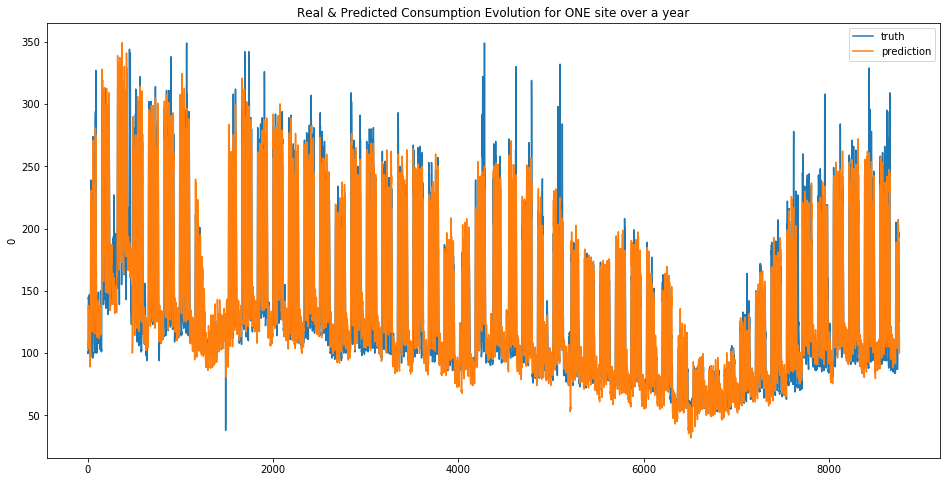

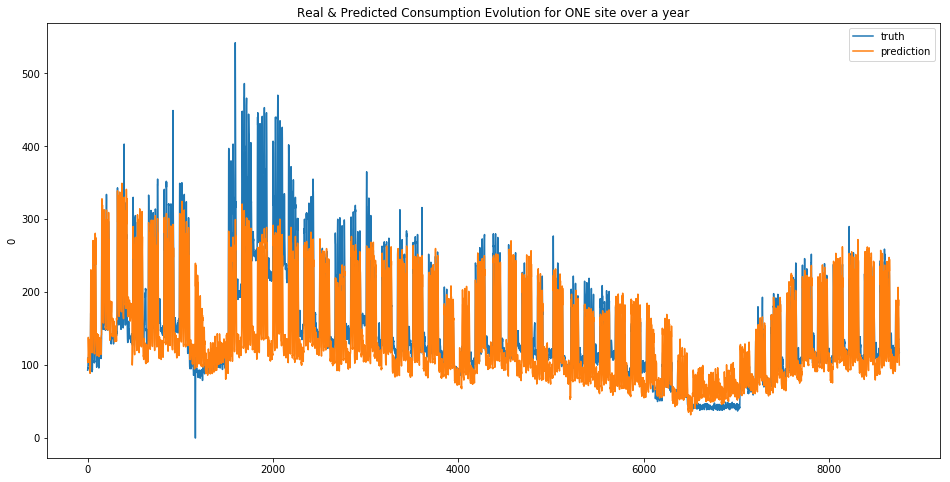

In [90]:
linear_base_1, linear_base_2 = LinearRegression(), LinearRegression()
linear_base_1.fit(X_train_1, y_train_1)
linear_base_2.fit(X_train_2, y_train_2)
res_lin_reg_1, res_lin_reg_2 = general_wrapper(linear_base_1, linear_base_2, 'linear_reg', y_train_1, y_train_2)

Your submission score is : 19.24

We can see that the linear regression model doesn't make good predictions for spikes... this is more obvious for the second site. And that why the MAE was choosen !

### Lasso

weighted_mean_absolute_error on X_train_1 : 26.061965525312893
weighted_mean_absolute_error on X_train_2 : 28.710534100722768


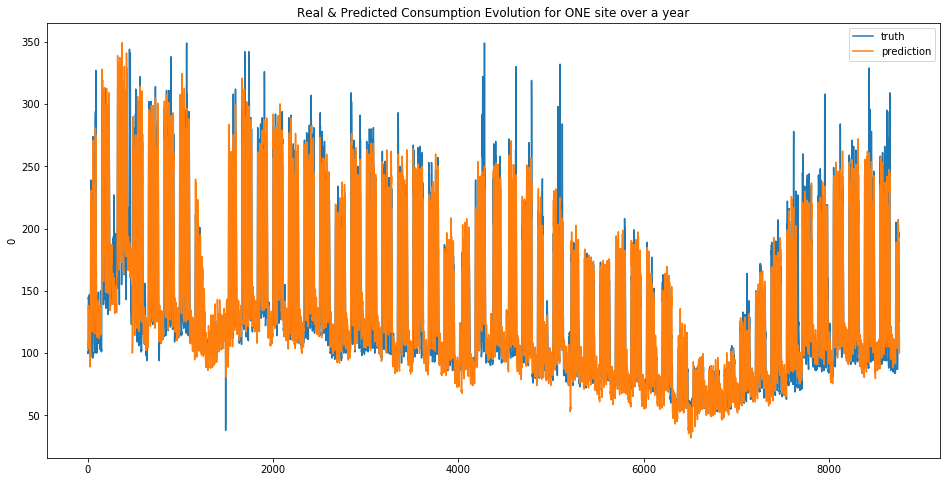

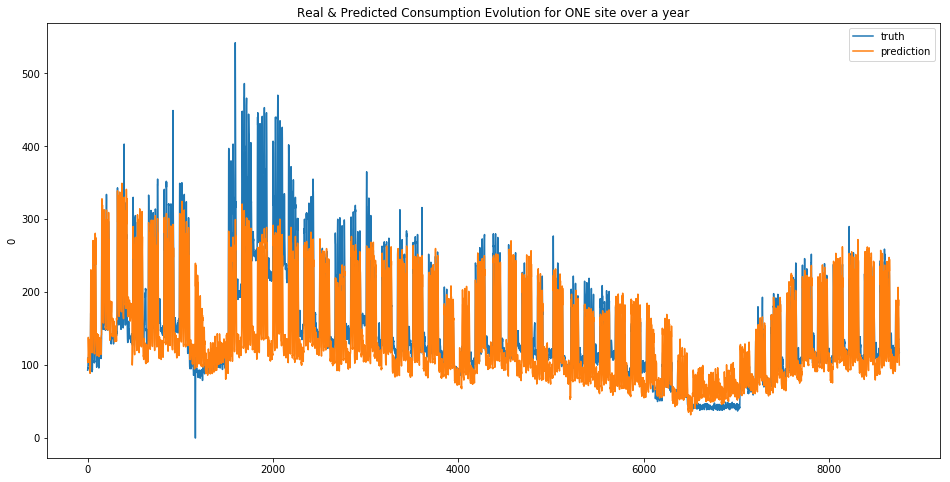

In [92]:
lasso_base_1, lasso_base_2 = Lasso(alpha=0.01, max_iter=10e5), Lasso(alpha=0.01, max_iter=10e5)
lasso_base_1.fit(X_train_1, y_train_1)
lasso_base_2.fit(X_train_2, y_train_2)
res_lasso_1, res_lasso_2 = general_wrapper(lasso_base_1, lasso_base_2, 'lasso', y_train_1, y_train_2)

Your submission score is : 23.70

### ElasticNet

weighted_mean_absolute_error on X_train_1 : 26.16342615122434
weighted_mean_absolute_error on X_train_2 : 31.322618027652748


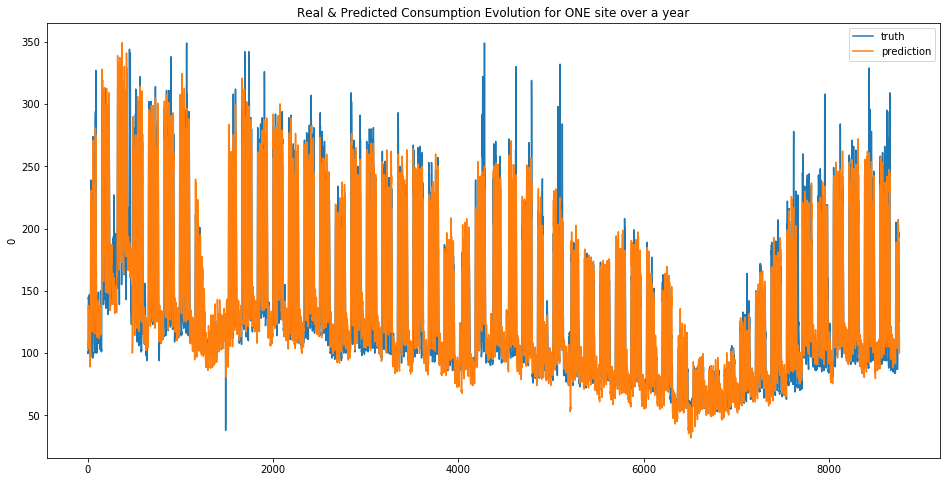

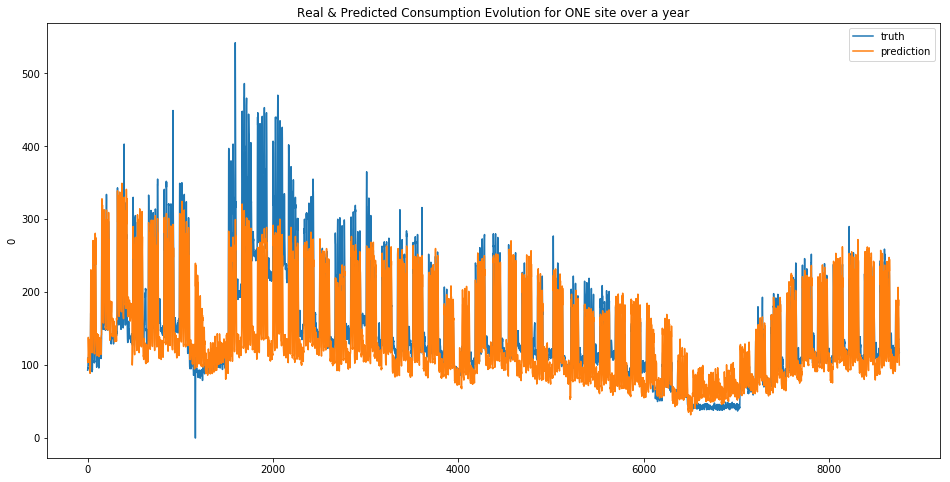

In [93]:
elast_base_1, elast_base_2 = ElasticNet(alpha=0.01, max_iter=10e8), ElasticNet(alpha=0.1, max_iter=10e8)
elast_base_1.fit(X_train_1, y_train_1)
elast_base_2.fit(X_train_2, y_train_2)
res_elasticnet_1, res_elasticnet_2 = general_wrapper(elast_base_1, elast_base_2, 'elastic_net', y_train_1, y_train_2)

Your submission score is : 23.70

### RidgeRegression

weighted_mean_absolute_error on X_train_1 : 26.055361466167927
weighted_mean_absolute_error on X_train_2 : 28.695385473745706


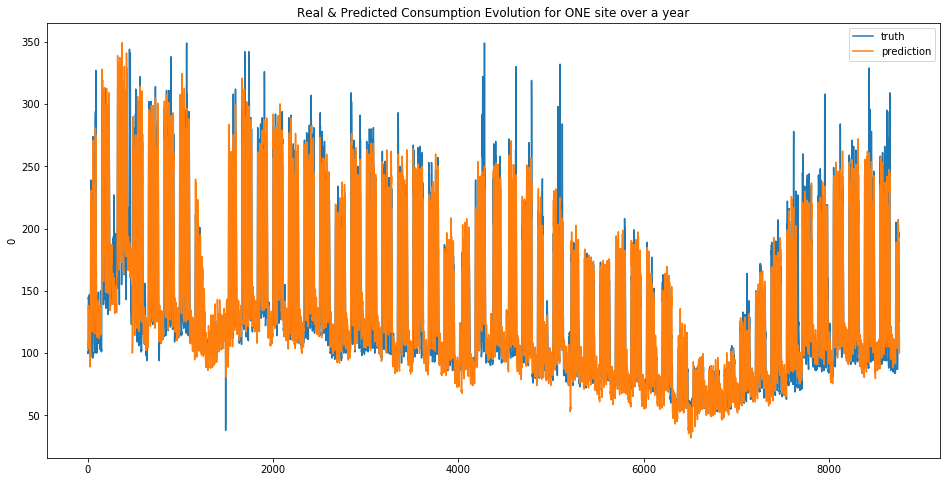

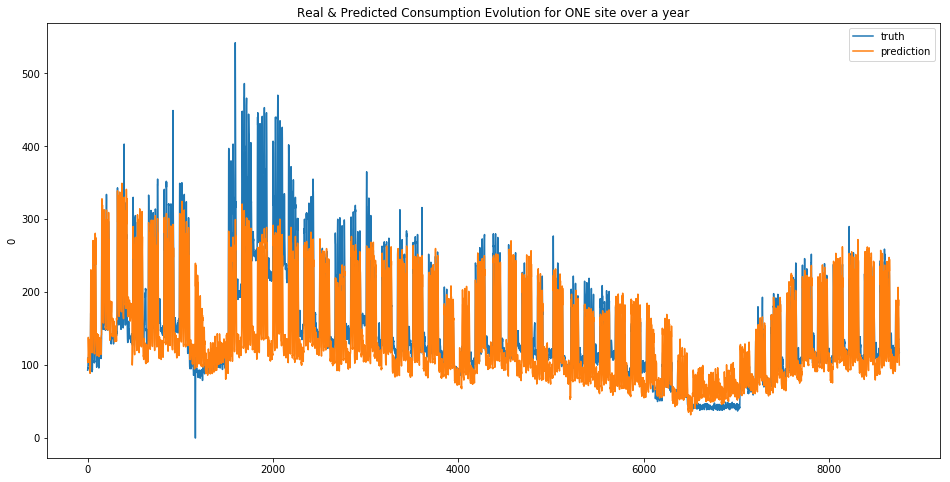

In [94]:
ridge_base_1, ridge_base_2 = Ridge(alpha=0.1, max_iter=10e10), Ridge(alpha=0.1, max_iter=10e10)
ridge_base_1.fit(X_train_1, y_train_1)
ridge_base_2.fit(X_train_2, y_train_2)
create_submission(ridge_base_1, ridge_base_2, 'ridge_reg')
res_ridge_1, res_ridge_2 = general_wrapper(ridge_base_1, ridge_base_2, 'ridge_reg', y_train_1, y_train_2)

Your submission score is : 23.70

### Adaboost Regressor

/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


weighted_mean_absolute_error on X_train_1 : 43.00999458773894
weighted_mean_absolute_error on X_train_2 : 45.683418578620746


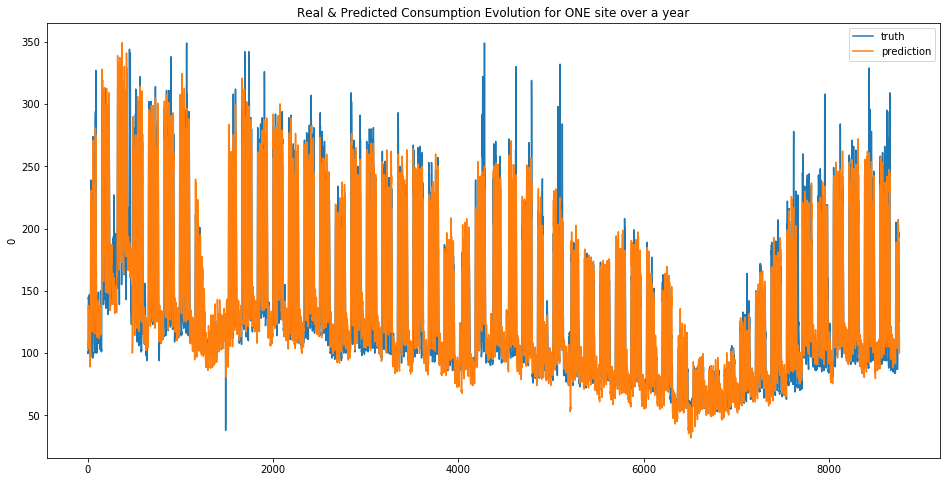

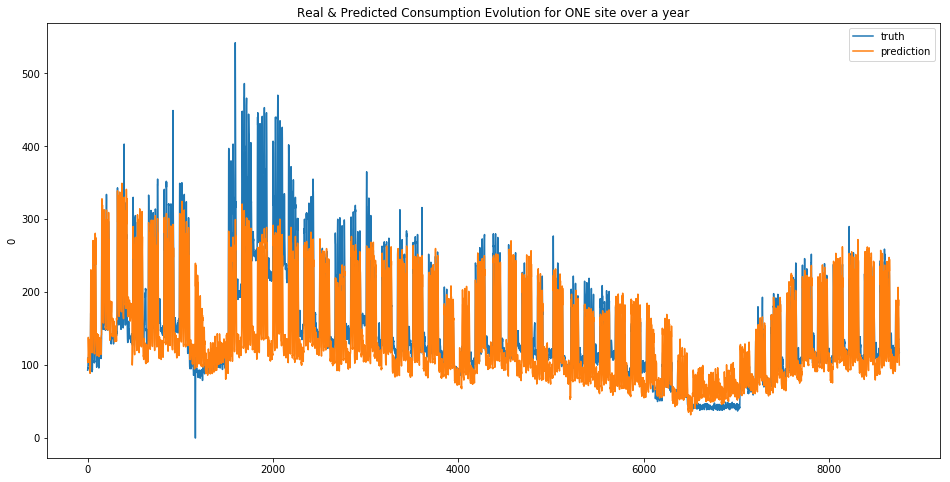

In [95]:
adaboost_base_1, adaboost_base_2 = AdaBoostRegressor(), AdaBoostRegressor()
adaboost_base_1.fit(X_train_1, y_train_1)
adaboost_base_2.fit(X_train_2, y_train_2)
res_adaboost_1, res_adaboost_2 = general_wrapper(adaboost_base_1, adaboost_base_2, 'adaboost_reg', y_train_1, y_train_2)

Your submission score is : ????

### SVR(kernel='linear')

/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


weighted_mean_absolute_error on X_train_1 : 24.78463504218071
weighted_mean_absolute_error on X_train_2 : 26.999353814493194


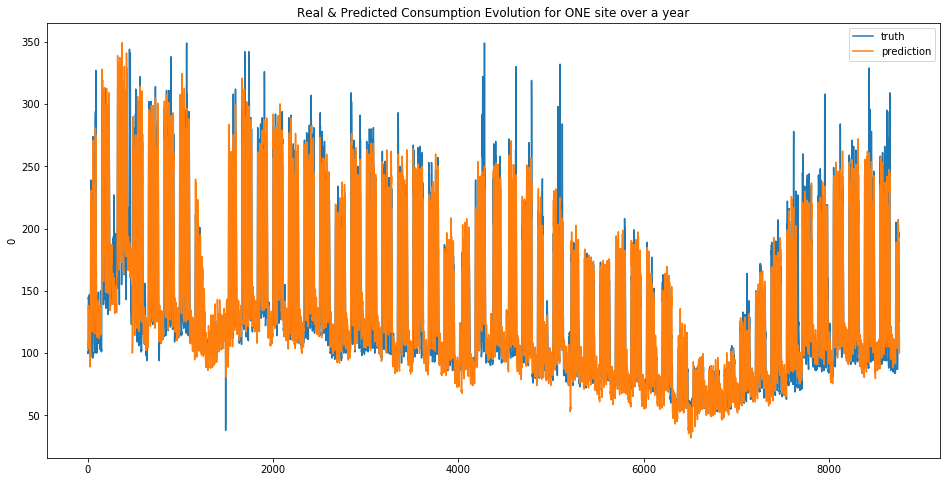

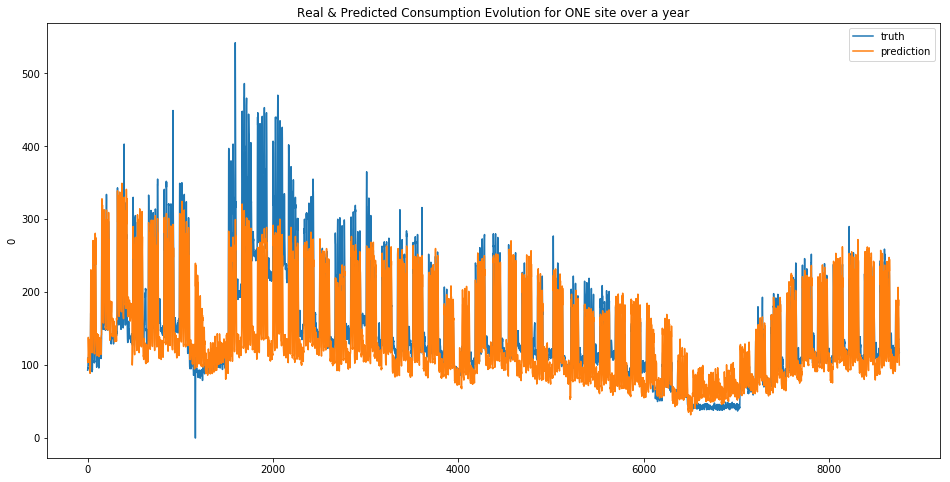

In [96]:
svr_base_1 = SVR(kernel='linear')
svr_base_2 = SVR(kernel='linear')
svr_base_1.fit(X_train_1, y_train_1)
svr_base_2.fit(X_train_2, y_train_2)
res_svr_1, res_svr_2 = general_wrapper(svr_base_1, svr_base_2, 'svr_lin', y_train_1, y_train_2)

Your submission score is : ????

### SVR(kernel='rbf')

/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


weighted_mean_absolute_error on X_train_1 : 39.22806743679658
weighted_mean_absolute_error on X_train_2 : 33.98994529863917


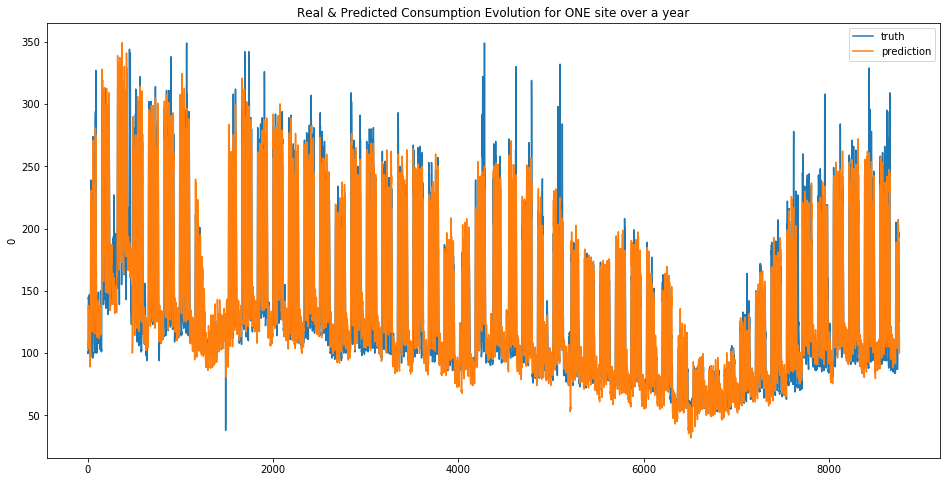

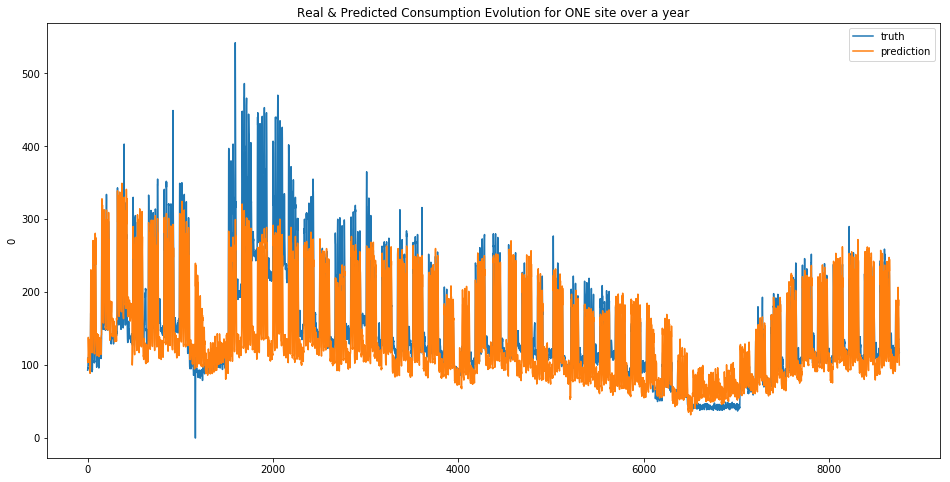

In [97]:
#svr_base_1 = SVR(kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
svr_base_rbf_1 = SVR(kernel='rbf')
svr_base_rbf_2 = SVR(kernel='rbf')
svr_base_rbf_1.fit(X_train_1, y_train_1)
svr_base_rbf_2.fit(X_train_2, y_train_2)
res_svr_base_rbf_1, res_svr_base_rbf_2 = general_wrapper(svr_base_rbf_1, svr_base_rbf_2, 'svr_base_rbf', y_train_1, y_train_2)

Your submission score is : 23.70

---

# Results comparison and conclusions

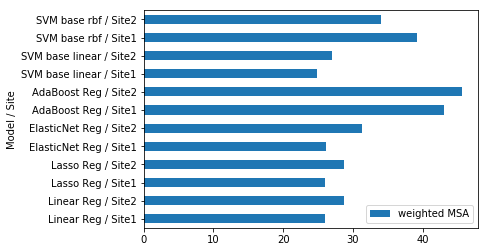

In [102]:
df_score = pd.DataFrame({'Model / Site':['Linear Reg / Site1', 'Linear Reg / Site2',
                                  'Lasso Reg / Site1', 'Lasso Reg / Site2',
                                  'ElasticNet Reg / Site1', 'ElasticNet Reg / Site2',
                                  'AdaBoost Reg / Site1', 'AdaBoost Reg / Site2',
                                  'SVM base linear / Site1', 'SVM base linear / Site2',
                                  'SVM base rbf / Site1', 'SVM base rbf / Site2'],
                        'weighted MSA':[res_lin_reg_1, res_lin_reg_2, 
                                        res_lasso_1, res_lasso_2, 
                                        res_elasticnet_1, res_elasticnet_2, 
                                        res_adaboost_1, res_adaboost_2, 
                                        res_svr_1, res_svr_2, 
                                        res_svr_base_rbf_1, res_svr_base_rbf_2]})
ax = df_score.plot.barh(y='weighted MSA', x='Model / Site')

* Except the SVM model with an rbf base, all models doesn't perform better for the 2nd site, which can be explained by the fact that site doesn't present regular oscillations.
* Finally, Linear Reg, Lasso and ElasticNet have similar results, because regularization doesn't help to predict well spikes
* SVM base rbf and Adaboost have worst results than linear regression w/ or w/o regularization.

All these models don't work well when it comes to time series, in the next part we'll use the SARIMA library and Recurrent Neural Networks R.N.N which are more appropriate for this kind of prediction.